<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [문화] 영화 관객수 예측 모델 개발

[링크 텍스트](https://dacon.io/competitions/open/235536/codeshare)

1 title : 영화의 제목

2 distributor : 배급사

3 genre : 장르

4 release_time : 개봉일

5 time : 상영시간(분)

6 screening_rat : 상영등급

7 director : 감독이름

8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 
평균 관객수(단 관객수가 알려지지 않은 영화 제외)

9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 
관객수가 알려지지 않은 영화 제외)

10 num_staff : 스텝수

11 num_actor : 주연배우수

12 box_off_num : 관객수




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
plt.rc('font', family='NanumBarunGothic') 

In [5]:
train=pd.read_csv('movies_train.csv')
test=pd.read_csv('movies_test.csv')
sub=pd.read_csv('submission.csv')

In [6]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [9]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [11]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [12]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

## EDA

In [13]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [62]:
train['director'].value_counts()

홍상수    7
전규환    4
신재호    4
장률     4
노진수    4
      ..
백운학    1
백동훈    1
임범     1
윤기형    1
도창훈    1
Name: director, Length: 472, dtype: int64

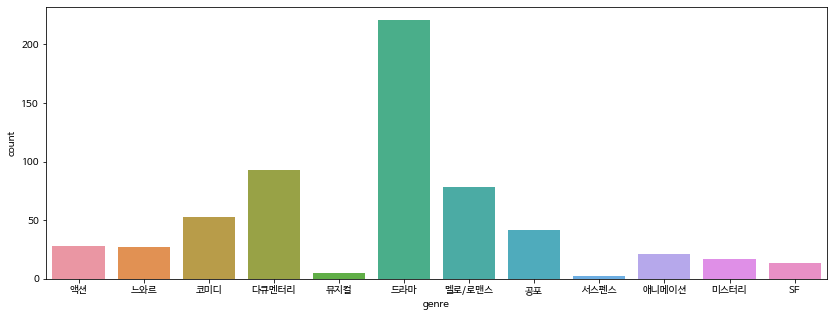

In [18]:
plt.figure(figsize=(14,5))
sns.countplot(data=train,x='genre')

In [16]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


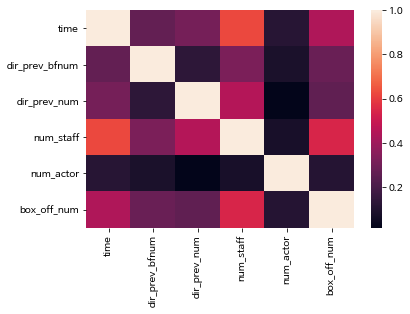

In [17]:
sns.heatmap(train.corr())

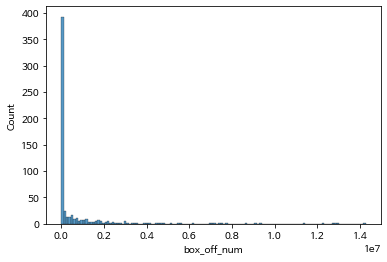

In [19]:
sns.histplot(data=train,x='box_off_num')

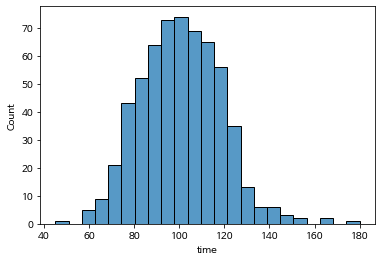

In [20]:
sns.histplot(data=train,x='time')

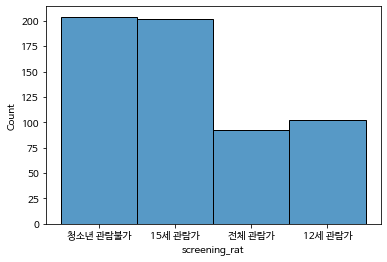

In [21]:
sns.histplot(data=train,x='screening_rat')

In [29]:
train['box_off_num'].sort_values()

432           1
324           2
338           8
410          10
481          36
         ...   
460    12323595
498    12706663
530    12811435
362    12983841
372    14262766
Name: box_off_num, Length: 600, dtype: int64

In [38]:
train.groupby('distributor').mean()['box_off_num'].sort_values()

distributor
인피니티엔터테인먼트         2.000000e+00
고구마공작소             8.000000e+00
사람과 사람들            4.200000e+01
위드시네마              4.600000e+01
나우콘텐츠              5.400000e+01
                       ...     
영구아트무비             2.541603e+06
쇼박스(주)미디어플렉스       2.634823e+06
(주)아이필름코퍼레이션       3.117859e+06
(주)쇼박스             3.386656e+06
CJ E&M Pictures    4.122337e+06
Name: box_off_num, Length: 169, dtype: float64

In [23]:
train.groupby('genre').mean()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
genre,,,,,,
SF,101.384615,1.788537e+06,1.307692,197.307692,3.692308,1.788346e+06
공포,100.214286,1.079739e+06,1.095238,176.380952,3.880952,5.908325e+05
느와르,115.370370,1.101198e+06,1.296296,311.074074,3.592593,2.263695e+06
다큐멘터리,88.053763,2.047492e+05,0.397849,17.849462,3.268817,6.717226e+04
드라마,104.651584,8.457249e+05,0.814480,164.484163,3.647059,6.256898e+05
멜로/로맨스,96.641026,1.200881e+06,0.987179,135.782051,3.410256,4.259680e+05
뮤지컬,107.000000,NaN,0.000000,2.200000,2.800000,6.627000e+03
미스터리,102.588235,9.025298e+05,1.235294,117.352941,2.882353,5.275482e+05
서스펜스,112.000000,5.342325e+05,1.000000,111.000000,3.000000,8.261100e+04


In [61]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

##  데이터 전처리

In [24]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [26]:
train['dir_prev_bfnum']=train['dir_prev_bfnum'].fillna(train['dir_prev_bfnum'].mean())
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [27]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [28]:
test['dir_prev_bfnum']=test['dir_prev_bfnum'].fillna(test['dir_prev_bfnum'].mean())
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [40]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [41]:
X_train=train[['dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor']]
y_train=train[['box_off_num']]
X_test=test[['dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor']]


## XGBoost

In [51]:
from xgboost import XGBClassifier


In [52]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
singleXGB = sub.copy()
singleXGB

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [54]:
singleXGB['box_off_num'] = model_xgb.predict(X_test)

In [56]:
singleXGB

,title,box_off_num
0,용서는 없다,4746
1,아빠가 여자를 좋아해,4746
2,하모니,3199
3,의형제,1250
4,평행 이론,112
...,...,...
238,해에게서 소년에게,484
239,울보 권투부,742
240,어떤살인,1547
241,말하지 못한 비밀,831


## 데이터 전처리

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [60]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [77]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train['genre']=le.fit_transform(train['genre'])
train['screening_rat']=le.fit_transform(train['screening_rat'])

test['genre']=le.fit_transform(test['genre'])
test['screening_rat']=le.fit_transform(test['screening_rat'])

In [72]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,3,조병옥,1.050443e+06,0,91,2,23398
1,내부자들,(주)쇼박스,2,2015-11-19,130,3,우민호,1.161602e+06,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,10,2013-06-05,123,1,장철수,2.207752e+05,4,343,4,6959083
3,나는 공무원이다,(주)NEW,11,2012-07-12,101,2,구자홍,2.389400e+04,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,11,2010-11-04,108,1,신근호,1.000000e+00,1,251,2,483387


In [78]:
X_train=train[['dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor','genre','screening_rat']]
y_train=train[['box_off_num']]
X_test=test[['dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor','genre','screening_rat']]


In [79]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
singleXGB = sub.copy()
singleXGB

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [80]:
singleXGB['box_off_num']=model_xgb.predict(X_test)

In [81]:
singleXGB

,title,box_off_num
0,용서는 없다,4746
1,아빠가 여자를 좋아해,462714
2,하모니,462714
3,의형제,1250
4,평행 이론,50308
...,...,...
238,해에게서 소년에게,484
239,울보 권투부,50308
240,어떤살인,1547
241,말하지 못한 비밀,831


In [82]:
singleXGB.to_csv('singleXGB.csv', index = False)